In [49]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [50]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [51]:
print("Training Data:", train_images.shape, train_labels.shape)
print("Testing Data:", test_images.shape, test_labels.shape)

Training Data: (60000, 28, 28) (60000,)
Testing Data: (10000, 28, 28) (10000,)


In [52]:
print(train_labels[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [53]:
#Unique from the train lables
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print("Total number of output classes:", number_of_total_classes)
print("All output Classes:", total_classes)

Total number of output classes: 10
All output Classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label : 7')

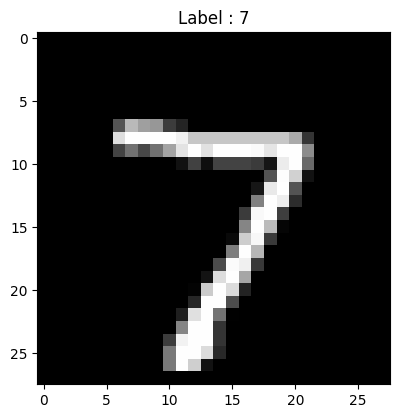

In [54]:
#Display the first image in testing data
plt.figure(figsize=[10,10])
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Label : {}".format(test_labels[0]))

Text(0.5, 1.0, 'Label : 7')

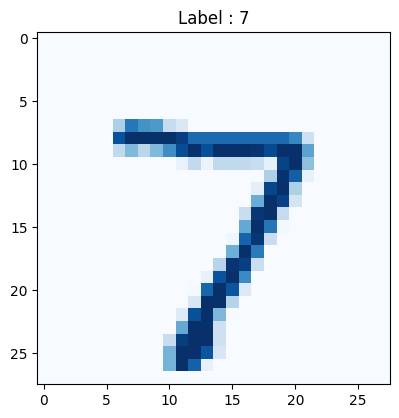

In [55]:
#Display the first image in testing data
plt.figure(figsize=[10,10])
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='Blues')
plt.title("Label : {}".format(test_labels[0]))

In [56]:
#Change from matrix to array of dimension 28*28 to array of dimension 784(NN must be 1D array)
newdimnsionData=np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], newdimnsionData)
test_data = test_images.reshape(test_images.shape[0], newdimnsionData)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


# **Data Preprocessing**

In [57]:
#Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

#Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

#Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [58]:
#Display the change for category label using one-hot encoding
print("Original label 6:", train_labels[10])
print("After conversion to categorical (one-hot) label:", train_labels_one_hot[10])

Original label 6: 3
After conversion to categorical (one-hot) label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# **Model Training**

In [59]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(newdimnsionData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(number_of_total_classes, activation='softmax'))

# **Model Configuration:**

In [60]:
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history=model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5058 - loss: 1.9132 - val_accuracy: 0.8376 - val_loss: 0.8601
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8416 - loss: 0.7608 - val_accuracy: 0.8800 - val_loss: 0.5128
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8739 - loss: 0.5069 - val_accuracy: 0.8942 - val_loss: 0.4115
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8881 - loss: 0.4218 - val_accuracy: 0.9027 - val_loss: 0.3662
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8973 - loss: 0.3737 - val_accuracy: 0.9071 - val_loss: 0.3372
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9028 - loss: 0.3498 - val_accuracy: 0.9114 - val_loss: 0.3163
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9081 - loss: 0.3253 - val_accuracy: 0.9165 - val_loss: 0.3015
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9132 - loss: 0.3110 - val_acc

# **Model Evaluation**

In [62]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9139 - loss: 0.3114
Evaluation result on Test Data : Loss = 0.2703442871570587, accuracy = 0.9254999756813049


In [63]:
y_pred = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [64]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [65]:
y_pred_labels

array([7, 2, 1, ..., 4, 5, 6])

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_labels, test_labels)

array([[ 962,    0,    8,    4,    1,   10,   12,    2,    7,   10],
       [   0, 1111,    6,    0,    3,    3,    3,   11,    9,    8],
       [   3,    2,  923,   22,    4,    5,    4,   25,    7,    2],
       [   1,    2,   15,  906,    0,   22,    1,    5,   18,    9],
       [   0,    0,   13,    0,  920,    6,   12,    6,    9,   35],
       [   4,    3,    3,   35,    1,  803,   17,    0,   29,   12],
       [   6,    4,   12,    2,   10,   10,  907,    0,   13,    1],
       [   1,    1,   19,   16,    2,    3,    1,  953,   12,   17],
       [   3,   12,   29,   17,    4,   24,    1,    2,  860,    5],
       [   0,    0,    4,    8,   37,    6,    0,   24,   10,  910]])

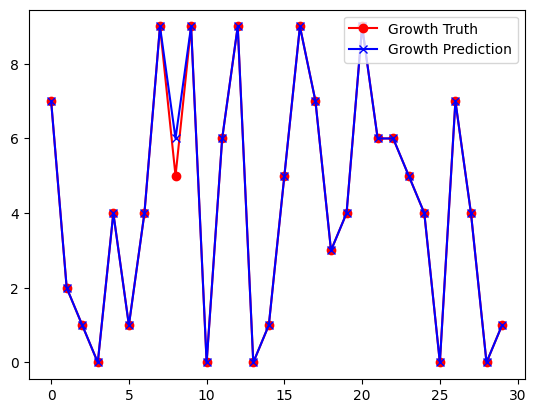

In [68]:
plt.plot(range(len(test_labels))[:30], test_labels[:30], color='r', label='Growth Truth', linestyle='-', marker='o' )
plt.plot(range(len(y_pred_labels))[:30], y_pred_labels[:30], color='b', label='Growth Prediction', linestyle='-', marker='x')
plt.legend()
plt.show()

# **CONVERT CODE INTO PYTORCH**

# Import Libraries

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


#Load and Preprocess Data

In [70]:
from torchvision import datasets, transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11355047.41it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1953234.45it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14603335.42it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3589022.00it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [71]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Flatten input to 784
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [73]:
num_epochs = 5

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.6135
Epoch [2/5], Loss: 0.1578
Epoch [3/5], Loss: 0.4577
Epoch [4/5], Loss: 0.4066
Epoch [5/5], Loss: 0.0661


In [76]:
model.eval()  # Set model to evaluation mode
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"Evaluation result on Test Data : Loss = {test_loss/len(test_loader)}, Accuracy = {test_acc}")

Evaluation result on Test Data : Loss = 0.2567372231738298, Accuracy = 0.9275


In [77]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_labels, all_preds)
print(cm)



[[ 959    0    3    2    0    6    7    2    1    0]
 [   0 1108    4    2    0    1    4    2   14    0]
 [   9    7  948   13    9    2   14   12   15    3]
 [   2    1   16  939    0   23    2   13    8    6]
 [   1    3    4    1  922    0   15    2    5   29]
 [   9    3    7   41    4  779   16    6   21    6]
 [  10    3    5    1    7   12  918    1    1    0]
 [   3   10   25    8    5    0    0  957    2   18]
 [   7    9    8   34    7   32   17   12  843    5]
 [  12    8    1   12   37    8    1   23    5  902]]


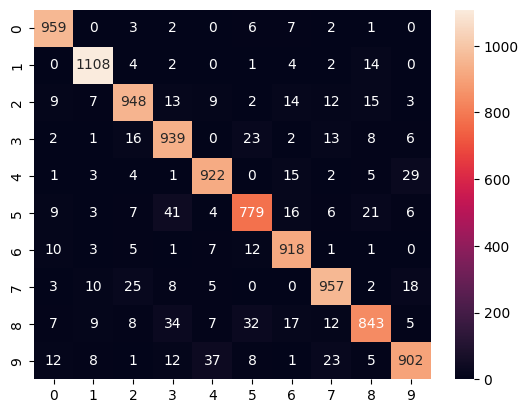

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

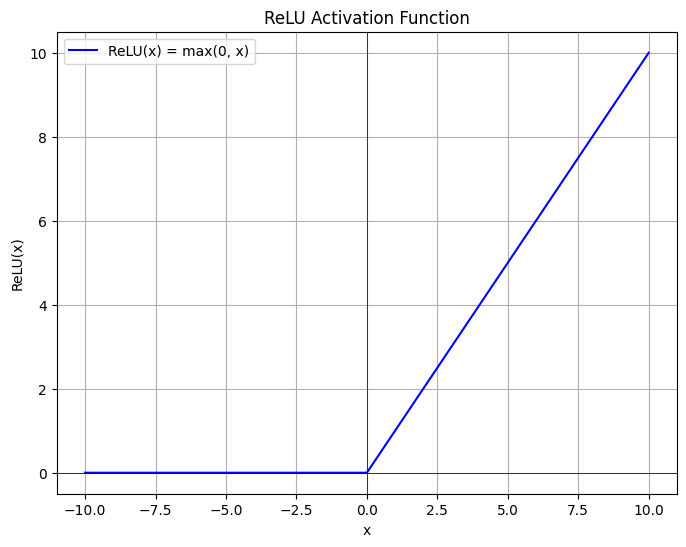

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-10, 10, 400)
y = relu(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU(x) = max(0, x)', color='b')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()